In [78]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [79]:
titanic=pd.read_csv('./Titanic_new.csv')
titanic.head()

,Unnamed: 0,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,3,1,22.0,1,0,7.2500,0.0
1,1,1,1,0,38.0,1,0,71.2833,1.0
2,2,1,3,0,26.0,0,0,7.9250,0.0
3,3,1,1,0,35.0,1,0,53.1000,0.0
4,4,0,3,1,35.0,0,0,8.0500,0.0


In [80]:
titanic.isna().sum()

Unnamed: 0    0
Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [81]:
titanic.describe()

,Unnamed: 0,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,448.364807,0.410587,2.248927,0.629471,28.875064,0.519313,0.432046,34.445457,0.256080
std,259.231993,0.492293,0.833303,0.483292,13.517338,0.936745,0.849340,52.668510,0.515048
min,0.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,221.500000,0.000000,1.000000,0.000000,20.000000,0.000000,0.000000,8.050000,0.000000
50%,443.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,15.550000,0.000000
75%,678.500000,1.000000,3.000000,1.000000,37.000000,1.000000,1.000000,32.750000,0.000000
max,890.000000,1.000000,3.000000,1.000000,62.000000,5.000000,6.000000,512.329200,2.000000


In [82]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  699 non-null    int64  
 1   Survived    699 non-null    int64  
 2   Pclass      699 non-null    int64  
 3   Sex         699 non-null    int64  
 4   Age         699 non-null    float64
 5   SibSp       699 non-null    int64  
 6   Parch       699 non-null    int64  
 7   Fare        699 non-null    float64
 8   Embarked    699 non-null    float64
dtypes: float64(3), int64(6)
memory usage: 49.3 KB


In [83]:
y=titanic.Survived
y

0      0
1      1
2      1
3      1
4      0
      ..
694    0
695    0
696    1
697    1
698    0
Name: Survived, Length: 699, dtype: int64

In [84]:
titanic.drop(columns=['Survived','Unnamed: 0'],inplace=True)

In [85]:
x=titanic
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,0.0
1,1,0,38.0,1,0,71.2833,1.0
2,3,0,26.0,0,0,7.9250,0.0
3,1,0,35.0,1,0,53.1000,0.0
4,3,1,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...,...
694,3,0,39.0,0,5,29.1250,2.0
695,2,1,27.0,0,0,13.0000,0.0
696,1,0,19.0,0,0,30.0000,0.0
697,1,1,26.0,0,0,30.0000,1.0


In [86]:
sc=StandardScaler()
x=sc.fit_transform(x)

In [87]:
x

array([[ 0.901966  ,  0.76722641, -0.50897504, ..., -0.50904837,
        -0.51672112, -0.4975525 ],
       [-1.4998406 , -1.30339622,  0.6755376 , ..., -0.50904837,
         0.69992908,  1.4454039 ],
       [ 0.901966  , -1.30339622, -0.21284688, ..., -0.50904837,
        -0.50389593, -0.4975525 ],
       ...,
       [-1.4998406 , -1.30339622, -0.73107116, ..., -0.50904837,
        -0.0844649 , -0.4975525 ],
       [-1.4998406 ,  0.76722641, -0.21284688, ..., -0.50904837,
        -0.0844649 ,  1.4454039 ],
       [ 0.901966  ,  0.76722641,  0.23134536, ..., -0.50904837,
        -0.50722098,  3.38836031]])

In [88]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [89]:
model=KNeighborsClassifier()

In [90]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [91]:
y_pred=model.predict(x_test)

In [92]:
accuracy_score(y_pred,y_test)

0.8

In [93]:
cm=confusion_matrix(y_pred,y_test)
cm

array([[71, 15],
       [13, 41]], dtype=int64)

In [94]:
import seaborn as sns 

<Axes: >

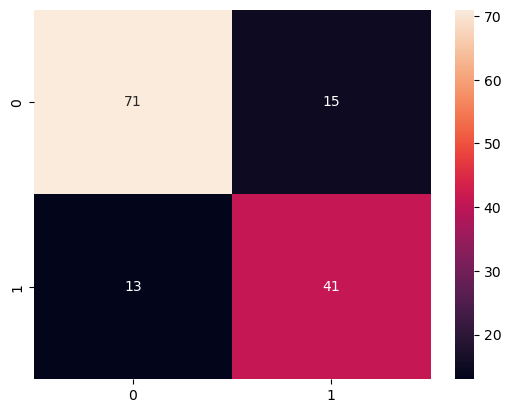

In [95]:
sns.heatmap(cm,annot=True)

In [96]:
y.value_counts()

0    412
1    287
Name: Survived, dtype: int64

In [97]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x1e99654fd00>,
 [Text(-0.30494325570034814, 1.05688675401051, 'survive'),
  Text(0.3049433546532257, -1.0568867254596575, 'notsurvive')],
 [Text(-0.1663326849274626, 0.5764836840057327, '58.9%'),
  Text(0.16633273890175945, -0.5764836684325403, '41.1%')])

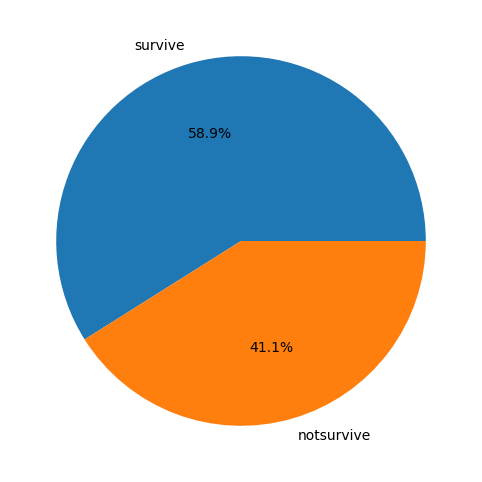

In [98]:
plt.figure(figsize=(12,6))
plt.pie(x=y.value_counts(),labels=['survive','notsurvive'],autopct='%1.1f%%')

In [99]:
score=[]
for i in range(1,20):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    score.append(model.score(x_test,y_test))
    #هنا ف الكود ده حددتله جزء معين هعمل عليه تنبؤ واشوف كل جزء هيوصل لكفاءه كام عند نقطه كام 

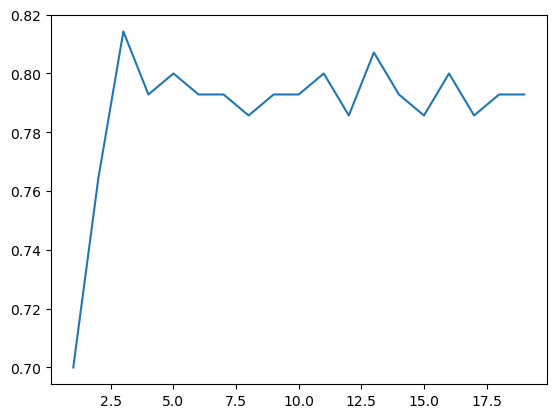

In [100]:
plt.plot(range(1,20),score)

In [114]:
from sklearn.model_selection import GridSearchCV

In [120]:
#grid search 
knn_model = KNeighborsClassifier()
param = {
    "n_neighbors" : list(range(1, 40)),
    #1 = manhattan,  2 = euclidian 
    "p" : [1, 2]
}

In [121]:
gs = GridSearchCV(knn_model, param, cv = 5)
#fit grid search
gs.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'p': [1, 2]})

In [122]:
print(gs.best_params_)

{'n_neighbors': 14, 'p': 2}


In [123]:
print(gs.best_score_)

0.8211229086229086
